## The Report of Study Case
written by Selcuk Emre Ozer


___

This report is written to show deficiencies of study case.

___

Deficiencies are going to be reviewed in 2 titles.

### Titles:
* SQL Deficincies
* Altair Deficincies

Before starting there is an important article about why pie charts should not be used:
https://theconversation.com/heres-why-you-should-almost-never-use-a-pie-chart-for-your-data-214576#:~:text=The%20pie%20chart's%20circularity%20means%20the%20areas%20lack%20a%20common%20reference%20point.&text=Pie%20charts%20also%20do%20badly,of%20categories%20in%20one%20pie.

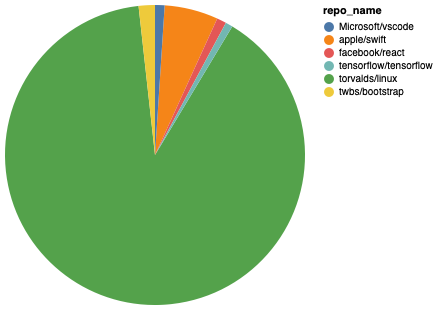

---

To review the data set, First of all we need some basic libraries. These are:<br><br>
1.**Altair** _(for visualization)_<br>
2.**Pandas** _(for data analysis and prepare data sets)_

In [7]:
# Libraries
import pandas as pd
import altair as alt

In [8]:
# connect to bigquery
import json
from google.oauth2 import service_account
from google.cloud import bigquery

path = '/Users/selcu/Desktop/bruin/bruin-hiring-1b27c94e981a.json'

with open(path, 'r') as f:
    json_key_file = json.load(f)
    
credentials = service_account.Credentials.from_service_account_info(json_key_file)

client = bigquery.Client(credentials=credentials, project=credentials.project_id)

___

### Most Popular Repos

By using the Dataset, we can detect the most popular repos with sql queries.

In [34]:
query = """
SELECT
    repo_name as `repo name`,
    COUNT(*) as counter
FROM
    `bruin-hiring.github_repos.sample_commits`
GROUP BY
    `repo name`
ORDER BY
    counter

"""
query_job = client.query(query)
result = query_job.result()

---

After query(above code), we need to create a data frame to visualize these data.

In [36]:
x_axis = [] # axis
y_axis = []

for row in result:
    x_axis.append(row[0])
    y_axis.append(row[1])

df = pd.DataFrame({'repo name':x_axis,'count of repos':y_axis})

In [57]:
# dataframe
df

,repo name,count of repos
0,tensorflow/tensorflow,5253
1,facebook/react,6875
2,Microsoft/vscode,6909
3,twbs/bootstrap,11777
4,apple/swift,38891
5,torvalds/linux,602604


---

Here dataset is ready for visualizing. Now we can create a chart.

`.sort()` for sorting

In [64]:
alt.Chart(df).mark_bar().encode(
    
    x=alt.X('repo name',).sort('-y'),
    y=alt.Y('count of repos')
    
)

/Users/selcu/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

---

### Question 2

In the study case, I got help from AI tools(ChatGPT). In this situation I could not learn basic of SQL properly. You can check the SQL deficincies which I have improved below this part.

#### SQL Part

In [ ]:
# QUESTION 2: Who are the top contributors?
# mistake is to prefer name to count top contrubitors?

SELECT 
    committer.name, <-------MISTAKE
    COUNT(*) as counter

FROM 
    table
GROUP BY 
    committer.name
ORDER BY 
    counter desc
LIMIT 10

People might have the same name, so to find top contributors properly, even though they have the same name, we should prefer a unique feature for each contrubitors. It is mail address. Each people has their own unique email address.

##### Correct SQL Code

In [106]:
query = """
SELECT 
    committer.name,
    committer.email,  -- CORRECT PREFERENCE
    COUNT(*) as mail_counter
FROM
     `bruin-hiring.github_repos.sample_commits`
GROUP BY
    committer.name,
    committer.email
ORDER BY
    mail_counter desc
LIMIT
    10
"""
query_job = client.query(query)
results = query_job.result()

In [108]:
x2 = [] # for chart, creating x and y axis lists
y2 = []


print("RESULTS:\n_______\n")

for row in results:
    x2.append(row[0]+' '+row[1][40:])
    y2.append(row[2])
    print(row[0]+' '+row[1][40:],'->' , row[2],'\n')


RESULTS:
_______

David S. Miller @davemloft.net -> 49523 

Linus Torvalds @linux-foundation.org -> 40480 

Greg Kroah-Hartman @linuxfoundation.org -> 37969 

Greg Kroah-Hartman @suse.de -> 19605 

John W. Linville @tuxdriver.com -> 18875 

Mauro Carvalho Chehab @redhat.com -> 13372 

Ingo Molnar @elte.hu -> 13311 

Linus Torvalds @g5.osdl.org -> 12197 

Linus Torvalds @woody.linux-foundation.org -> 8928 

Takashi Iwai @suse.de -> 8661 



You can see there is more than one Linus Torvalds

___

In [20]:
#### Altair Part(with mistakes)
df2 = pd.DataFrame({'contributors':x2,'number of contribution':y2})

alt.Chart(df2).mark_bar().encode(x = 'contributors', y = 'number of contribution',
                                color = alt.condition(
                                alt.datum.contributors == 'Mark Brown',
                                alt.value('orange'),
                                alt.value('steelblue')
                                )).properties(width=400)

/Users/selcu/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

#### Altair Part

You can see in new code, top cont. list does not include 'Mark Brown' as name. Because this Altair part is static and this is not convinent for changeable data cases. To fix this code >

In [23]:
#### Altair Fixed Part
max_index = df2['number of contribution'].idxmax() # max index

alt.Chart(df2).mark_bar().encode(x = 'contributors', y = 'number of contribution',
                                color = alt.condition(
                                alt.datum.contributors == df2['contributors'][max_index],
                                alt.value('orange'),
                                alt.value('steelblue')
                                )).properties(width=400)

/Users/selcu/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In addition to sort these data.<br>
(Detail is alternative using :<br>
    encode(x = 'contributors'... -> useless structure<br>
    encode(x = alt.X('contributors')... -> to add sorting
)

In [25]:
#### In addition
max_index = df2['number of contribution'].idxmax() # max index

alt.Chart(df2).mark_bar().encode(x = alt.X('contributors').sort('-y'),
                                 y =alt.Y('number of contribution'),
                                color = alt.condition(
                                alt.datum.contributors == df2['contributors'][max_index],
                                alt.value('orange'),
                                alt.value('steelblue')
                                )).properties(width=400)

/Users/selcu/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

---

### Question 3

3- Are there any developer contributing to more than 1 repos?


#### SQL Part

In [30]:
"""
CREATE TABLE bruin-hiring.cdt_selcukemreozer.q3 AS
    WITH developer_contribute as (
    SELECT
      committer.name as name,
      COUNT(DISTINCT repo_name) as repo_count
    FROM `github_repos.sample_commits`
    GROUP BY
      name
    )
    SELECT
      developer_contribute.name as name,
      developer_contribute.repo_count as repo_count
    FROM developer_contribute
    WHERE
      repo_count > 1;
"""

'\nCREATE TABLE bruin-hiring.cdt_selcukemreozer.q3 AS\n    WITH developer_contribute as (\n    SELECT\n      committer.name as name,\n      COUNT(DISTINCT repo_name) as repo_count\n    FROM `github_repos.sample_commits`\n    GROUP BY\n      name\n    )\n    SELECT\n      developer_contribute.name as name,\n      developer_contribute.repo_count as repo_count\n    FROM developer_contribute\n    WHERE\n      repo_count > 1;\n'

This part works correctly but it can be shorter

In [32]:
"""
CREATE OR REPLACE TABLE bruin-hiring.cdt_selcukemreozer.q3 as
SELECT
    committer.name as name,
    COUNT(DISTINCT repo_name) as repo_count
FROM 
    `github_repos.sample_commits`
GROUP BY 
    name
HAVING -- using of having provides a shorter query
    repo_count > 1
ORDER BY 
    repo_count DESC
"""

'\nCREATE OR REPLACE TABLE bruin-hiring.cdt_selcukemreozer.q3 as\nSELECT\n    committer.name as name,\n    COUNT(DISTINCT repo_name) as repo_count\nFROM \n    `github_repos.sample_commits`\nGROUP BY \n    name\nHAVING -- using of having provides a shorter query\n    repo_count > 1\nORDER BY \n    repo_count DESC\n'

`HAVING` provides a filter in group queries compared to where(cannot be used in group queries)

The result is the same but query is shorter.

#### Altair part

In [35]:
query = """
SELECT 
    *
FROM
    bruin-hiring.cdt_selcukemreozer.q3;
"""
query_job = client.query(query)
results = query_job.result()


x3 = [] # for chart, creating x and y axis lists
y3 = []

for row in results:
    x3.append(row[0])
    y3.append(row[1])
print("data is ready!")

data is ready!


In [36]:
df = pd.DataFrame({'name':x3,'number of diffirent repos':y3})
alt.Chart(df).mark_bar().encode(x='name',y='number of diffirent repos')

/Users/selcu/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

Above code there is an unaesthetic view, to fix that(sort):

In [38]:
alt.Chart(df).mark_bar().encode(x=alt.X('name').sort('-y'),y=alt.Y('number of diffirent repos'))

/Users/selcu/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

---

Question 4 has the same problem with Question 3

---

### Question 5

Number of commits per day

In [44]:
query = """
SELECT 
    *
FROM
    bruin-hiring.cdt_selcukemreozer.q5
"""

query_job = client.query(query)
results = query_job.result()

x5 = [] # for chart, creating x and y axis lists
y5 = []


for row in results:
    x5.append(row[0])
    y5.append(row[1])
print('query is ready')

query is ready


In [45]:
df5 = pd.DataFrame({'date':x5,'number of commits':y5})
df5["date"] = pd.to_datetime(df5["date"])

Above code line, the point is that date should not be a string type, to is scale by altair library. It must be date type. (.to_datetime())

In [47]:
# an example using
data = ['01-01-2023']
df_date = pd.DataFrame({'date_string': data})

df_date['date'] = pd.to_datetime(df_date['date_string'], format='%d-%m-%Y')


In [48]:
df_date

,date_string,date
0,01-01-2023,2023-01-01


In [49]:
alt.Chart(df5, width = 1200).mark_point().encode(x='date',y='number of commits')

alt.Chart(...)

The alternative chart types are line and bar

---

### Question 6

Number of commits per weekday

---

#### SQL Part

FORMAT_DATE using:

We have a column including date time format like in part below, it can. be useful in some cases bu t if we need spesific formats, we should use `FORMAT_DATE()`

In [ ]:
committer.date
"""   
    Row	       date

     1          2013-06-11 11:50:00 UTC
     2          2014-07-21 16:11:40 UTC
     3          2015-06-26 04:34:20 UTC
     4          2015-06-26 04:39:59 UTC
     5          2006-03-22 04:31:14 UTC
"""
    FORMAT_DATE('%A', committer.date)

 -> give us weekdays as day names

In [ ]:
"""
    Row	       date

     1          Friday
     2          Wednesday
     3          Sunday
    ...
"""

---

In [ ]:
FORMAT_DATE('%d', committer.date) 

-> give us days as numbers

In [ ]:
"""
    Row	       date

     1          01
     2          11
     3          31
    ...
"""                    

---

In [ ]:
FORMAT_DATE('%B',committer.date) -> give us months as month names
FORMAT_DATE('%m',committer.date) -> give us months as numbers

FORMAT_DATE('%C', colname) -> century??
FORMAT_DATE('%y', colname) -> give us years as numbers 

ex.
'02' means '2002'

to visualize it as full year: 

`FORMAT_DATE('20%y')` -> output is '2002'

----

#### Altair Part

In [58]:
query = """
SELECT
    *
FROM
    bruin-hiring.cdt_selcukemreozer.q6
"""

query_job = client.query(query)
results = query_job.result()

x6 = list()
y6 = list()

print("RESULTS:\n_______\n")

for row in results:
    x6.append(row[0])
    y6.append(row[1])
    print(row[0],'->',row[1])

RESULTS:
_______

Sunday -> 43072
Saturday -> 44814
Friday -> 112297
Thursday -> 114669
Monday -> 115061
Wednesday -> 120722
Tuesday -> 121674


In [60]:

df6 = pd.DataFrame({'days':x6,'count':y6})
df6


,days,count
0,Sunday,43072
1,Saturday,44814
2,Friday,112297
3,Thursday,114669
4,Monday,115061
5,Wednesday,120722
6,Tuesday,121674


In this dataset days are not ordered as weekdays. We should fix it in pandas.

In [63]:
df6.index = df6['days']
df6 = df6.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

To order days as weekdays
`df6 = df6.loc[['Monday','Tuesday',...`

In [66]:
alt.Chart(df6).mark_bar().encode(x=alt.X('days'),y=alt.Y('count'))

/Users/selcu/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

To prevent, default alphabetical sort in Altair lib, You should use alt.X(x, sort = None)

In [69]:
alt.Chart(df6).mark_bar().encode(x=alt.X('days',sort=None),y=alt.Y('count'))

/Users/selcu/opt/anaconda3/lib/python3.10/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

Be careful! To prevent alphabetic sorting `alt.X(xname,sort = 'None')`

To change sort `alt.X(xname).sort('-y')`

---

### LIKE using


In [28]:
query="""
CREATE OR REPLACE TABLE bruin-hiring.cdt_selcukemreozer.q7 AS
    WITH danger_commits As (
    SELECT 
      committer.name as name,
      repo_name,
      subject
    FROM
     `github_repos.sample_commits`
    WHERE
     LOWER(subject) LIKE '%danger%'

    )
    SELECT 
      repo_name,
      COUNT(*) as counter
    FROM 
      danger_commits
    GROUP BY repo_name
    ORDER BY counter DESC;

"""

for q7, table q7 has been created


`LOWER(subject) LIKE '%danger%'`
<br>Here we are looking for `danger` keyword in string structures. To find `danger` word in text, we have to use `%` sign at begin and end of the word `'%danger%'`.

To find text which start with `danger` use `%` at end of the word`'danger%'`

To find text which finish with `danger` use `%` at start of the word`'%danger'`, but do not put it to end of the word.

This sign `%` indicates that the text continues in the direction where the sign is.

In [117]:
df2['number oof vony']

,contributors,number of contribution
0,David S. Miller @davemloft.net,49523
1,Linus Torvalds @linux-foundation.org,40480
2,Greg Kroah-Hartman @linuxfoundation.org,37969
3,Greg Kroah-Hartman @suse.de,19605
4,John W. Linville @tuxdriver.com,18875
5,Mauro Carvalho Chehab @redhat.com,13372
6,Ingo Molnar @elte.hu,13311
7,Linus Torvalds @g5.osdl.org,12197
8,Linus Torvalds @woody.linux-foundation.org,8928
9,Takashi Iwai @suse.de,8661


_Selçuk Emre Özer_